<a href="https://colab.research.google.com/github/Duguze/2190/blob/main/Assignment3_Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

TA: Amirhossein Babaei Ravandi (amir.babaei@mail.utoronto.ca)

In [ ]:
# Import the necessary libraries for data processing and machine learning.

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# sklearn libraries for preprocessing, model selection, and metrics
from sklearn.preprocessing import StandardScaler  # To standardize features
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.model_selection import train_test_split  # To split the data into training and test sets
from sklearn.model_selection import KFold  # For K-fold cross-validation
from sklearn.metrics import make_scorer, confusion_matrix  # For creating custom metrics and confusion matrices
from sklearn.model_selection import learning_curve  # To generate a learning curve

# Libraries for visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For attractive and informative statistical graphics

sns.set_style('whitegrid')  # Set the style of seaborn plots to 'whitegrid'

# This command makes sure that plots are displayed inline in the Jupyter Notebook.
%matplotlib inline

## Part 1: Data Loading and Exploration


This assignment will guide you through the process of implementing logistic regression on a dataset to predict a binary outcome.
You'll start by loading and exploring the data, followed by cleaning and preparing the data for modeling.
You'll then build, evaluate, and optimize a logistic regression model, and finally, you'll interpret the results and discuss your findings.



**Q1: Loading the Dataset**
Load the Pima Indians Diabetes dataset using pandas.
Display the first 10 rows of the dataset.


In [ ]:
url= "https://raw.githubusercontent.com/Duguze/2190/main/diabetes.csv"
diabetes = pd.read_csv(url)
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1



**Q2: Descriptive Statistics**
Use pandas to display a summary of statistics for the numerical columns.


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



**Q3: Initial Data Insights**
Write down **three** insights you can gather from the descriptive statistics.


<font color='red'>


1. **Age:** The average age is 33.24, with a range from 21 to 81. The majority of individuals seem to be between 24 and 41 years old, based on the interquartile range.
2. **BMI:** The average BMI is approximately 31.99, with a minimum of 0. Similar to blood pressure, having a BMI of 0 is unusual. This might indicate missing or invalid data that needs attention during preprocessing.
3. **Blood Pressure:** The average blood pressure (BP) is around 69.11, with a maximum of 122.


</font>






**Q3.1:**
Given the presence of zero values in clinical measurements where zero is not feasible (like 'Glucose', 'BloodPressure', etc.), how would you approach the preprocessing of this dataset to make it suitable for building a reliable logistic regression model? Discuss the potential methods and their implications on model performance


<font color='red'>

1.   **Mean/Median Imputation:** Replace zero values with the mean or median of the respective feature. This is a simple approach but may introduce bias, especially if the zero values are not missing at random.
2.   **Remove Rows with Missing Values:** This might be appropriate if the missing values are a small proportion of the dataset. However, if a significant portion is removed, it can lead to loss of valuable information and potentially biased results.

</font>

## Part 2: Data Cleaning


**Q4: Handling Missing Values**
Identify any missing values in the dataset. Replace '0' values with `NaN` in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns.



In [ ]:
# replace 0 with nan
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, float('nan'))

In [ ]:
# identify null values
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

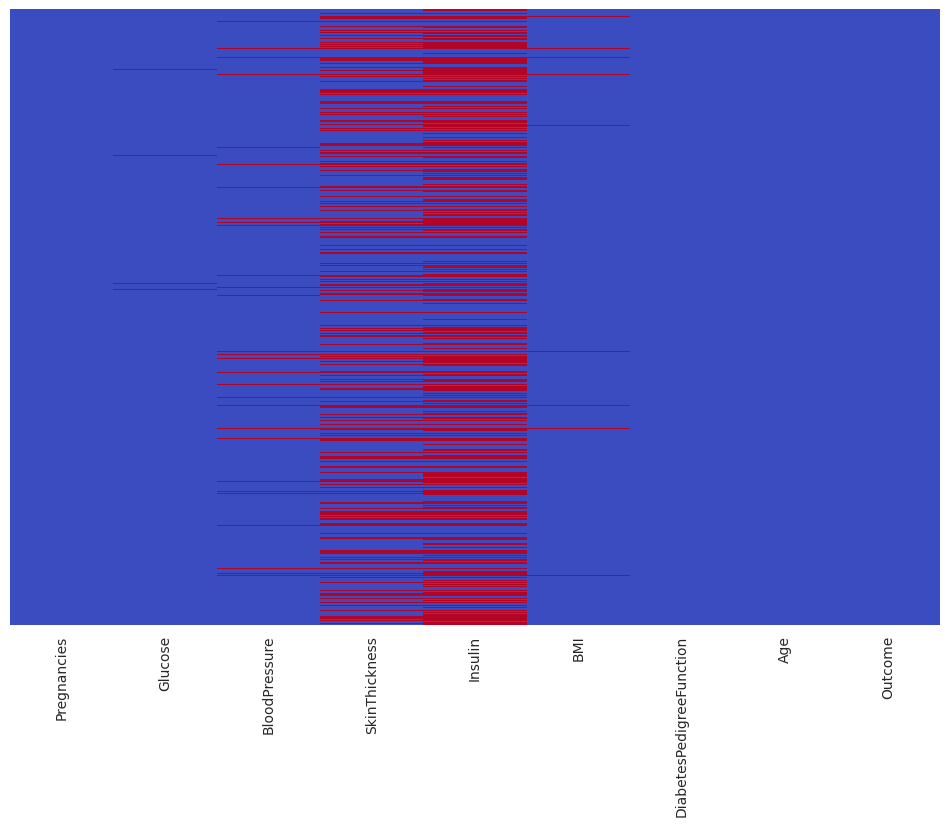

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(diabetes.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [ ]:
diabetes[(diabetes['Glucose'].isnull()) | (diabetes['BloodPressure'].isnull()) | (diabetes['SkinThickness'].isnull()) | (diabetes['Insulin'].isnull())| (diabetes['BMI'].isnull())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


**Q4.1** Fill in missing values


In [ ]:
# fill the nan value with the mean
diabetes.fillna(diabetes.mean(), inplace=True)

In [ ]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mode(), inplace=True)

TypeError: ignored

In [ ]:
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace=True)

In [ ]:
diabetes['BMI'].fillna(diabetes['BMI'].mode(), inplace=True)

In [ ]:
diabetes.isnull().sum()

AttributeError: ignored


**Q5: Correcting Data Types**
Check the data types of each column using the `dtypes` attribute.


In [ ]:
diabetes.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**Q5.1**: Imagine that you have a column representing the number of times a patient has been hospitalized, and it's incorrectly typed as a floating-point. What would be the appropriate data type for this column, and why? Write the code to convert this column to the correct data type.

<font color='red'>In this case, it would be more appropriate to represent the number of hospitalizations as an integer, as it's a count and typically whole numbers.
> df['Hospitalizations'] = df['Hospitalizations'].astype(int)

</font>


**Q6: Outlier Detection and Handling**
Plot boxplots for the 'Insulin' and 'BMI' columns to visualize outliers.


<Axes: ylabel='Insulin'>

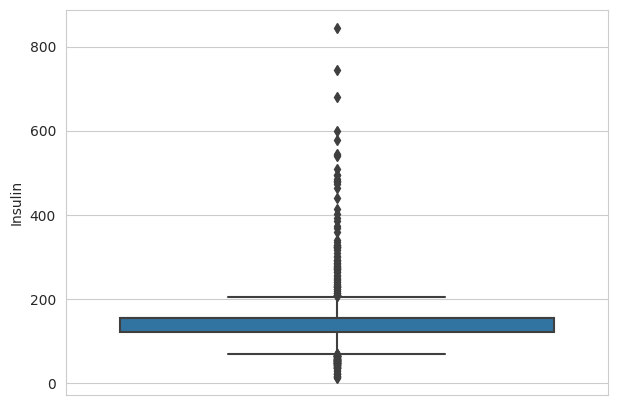

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot( y='Insulin', data=diabetes)

<Axes: ylabel='BMI'>

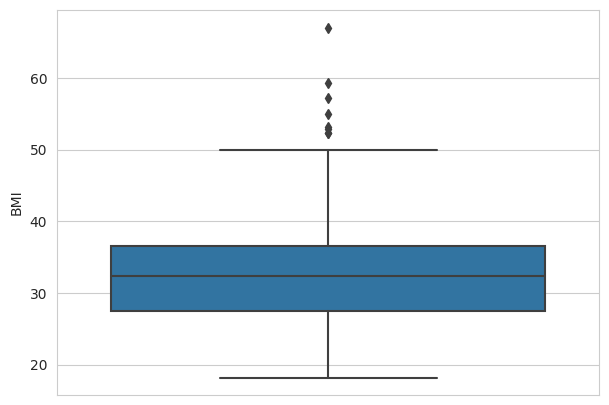

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot( y='BMI', data=diabetes)

**Q6.1** Is there any outlier? Briefly explain.

<font color='red'>Yes, for feature Insulin, there are many outliers above 200 and in range 200-800, and there are also many ourliers under 100. As for BMI, most outliers are higher than 50. </font>

**Q6.2: Handling Outliers**

Capping is a method used to limit the range of variable values, thus reducing the effect of outliers. It involves defining a lower and an upper threshold, often based on the interquartile range (IQR). Values that fall below or above this range are replaced with the threshold values. This method preserves the bulk of the data while minimizing the impact of extreme values.

The process generally involves the following steps:

Calculate the first quartile (Q1) and the third quartile (Q3) of the data.
Compute the IQR, which is the difference between Q3 and Q1.
Determine the lower bound as Q1 minus 1.5 times the IQR.
Determine the upper bound as Q3 plus 1.5 times the IQR.
Replace values below the lower bound with the lower bound value, and values above the upper bound with the upper bound value.


**Performs capping for the 'Insulin' and 'BMI' columns**

In [ ]:
def quantile_capping(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_limit = df[col].quantile(0.25) -( IQR * 1.5)
    upper_limit = df[col].quantile(0.75) + (IQR * 1.5)
    df[col] = np.where(df[col] >= upper_limit, upper_limit,
        np.where(df[col] <= lower_limit, lower_limit,
        df[col]))
    return df

In [ ]:
# insulin
diabetes = quantile_capping(diabetes, 'Insulin')

In [ ]:
# BMI
diabetes = quantile_capping(diabetes, 'BMI')

## Part 3: Data Visualization


**Q7: Histograms for Feature Distribution**
Create histograms for 'Glucose', 'BloodPressure', 'BMI', and 'Age'.


<Axes: >

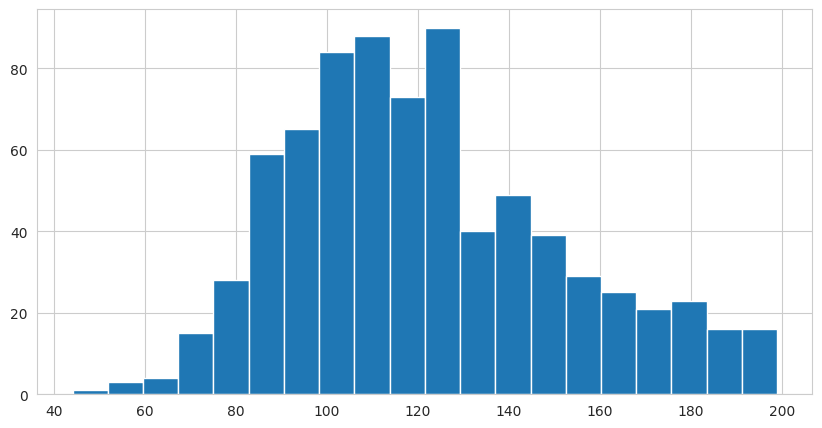

In [ ]:
fig = plt.figure(figsize=(10,5))
diabetes['Glucose'].hist(bins=20)

<Axes: >

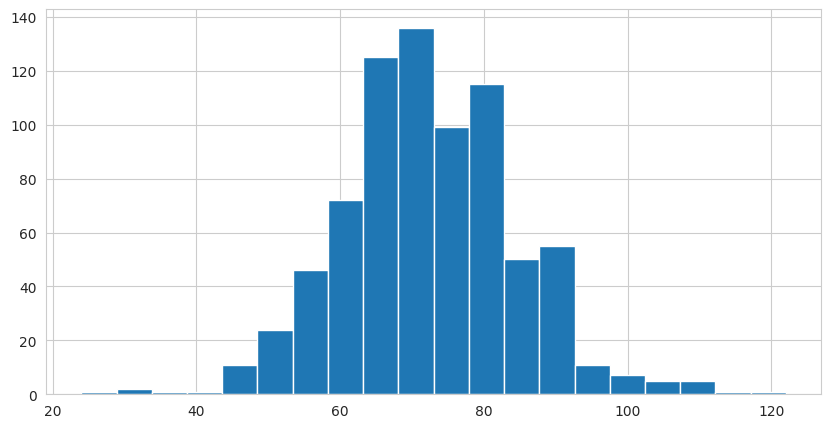

In [ ]:
fig = plt.figure(figsize=(10,5))
diabetes['BloodPressure'].hist(bins=20)

<Axes: >

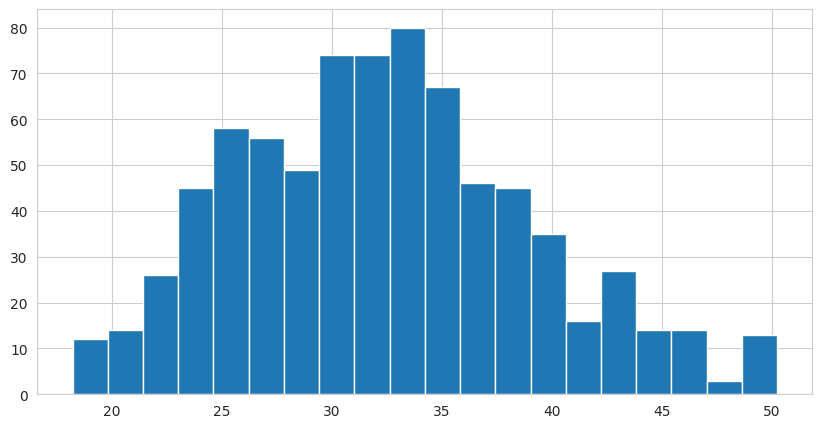

In [ ]:
fig = plt.figure(figsize=(10,5))
diabetes['BMI'].hist(bins=20)

<Axes: >

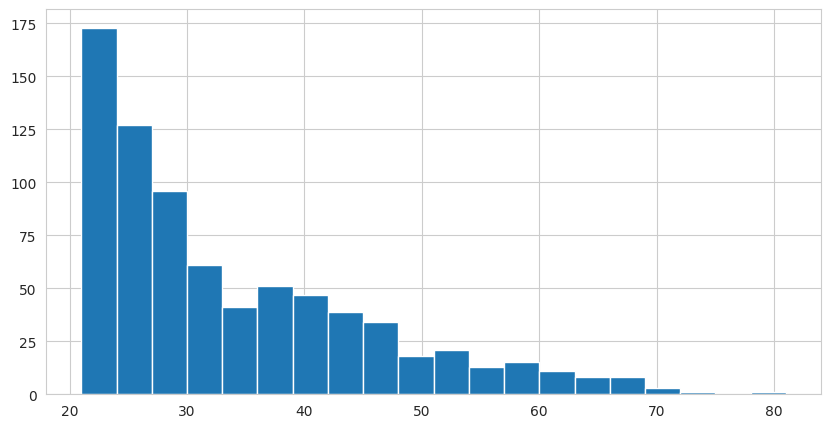

In [ ]:
fig = plt.figure(figsize=(10,5))
diabetes['Age'].hist(bins=20)


**Q8: Boxplots for Outcome Comparison**
Generate boxplots for 'Insulin' and 'DiabetesPedigreeFunction', separated by the 'Outcome' variable.


<Axes: xlabel='Outcome', ylabel='Insulin'>

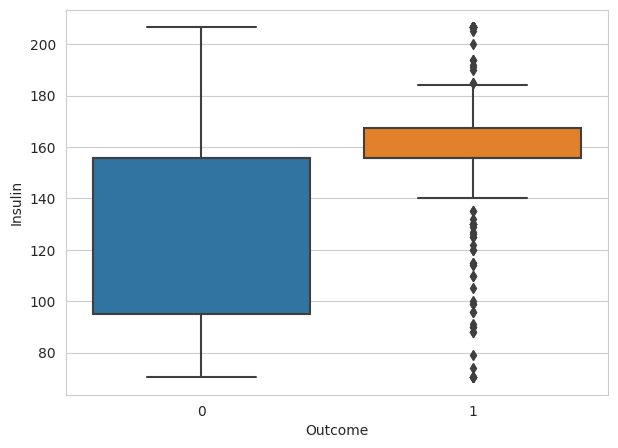

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x ='Outcome', y ='Insulin', data= diabetes)

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

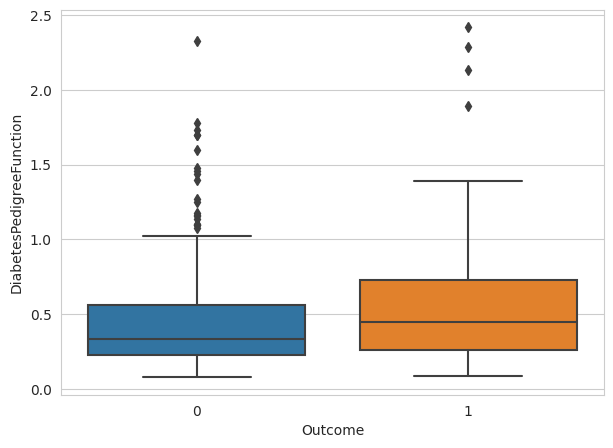

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x ='Outcome', y='DiabetesPedigreeFunction', data= diabetes)


**Q9: Pair Plot for Variable Relationships**
Create a pair plot for 'Glucose', 'BMI', 'Age', and 'Insulin'.


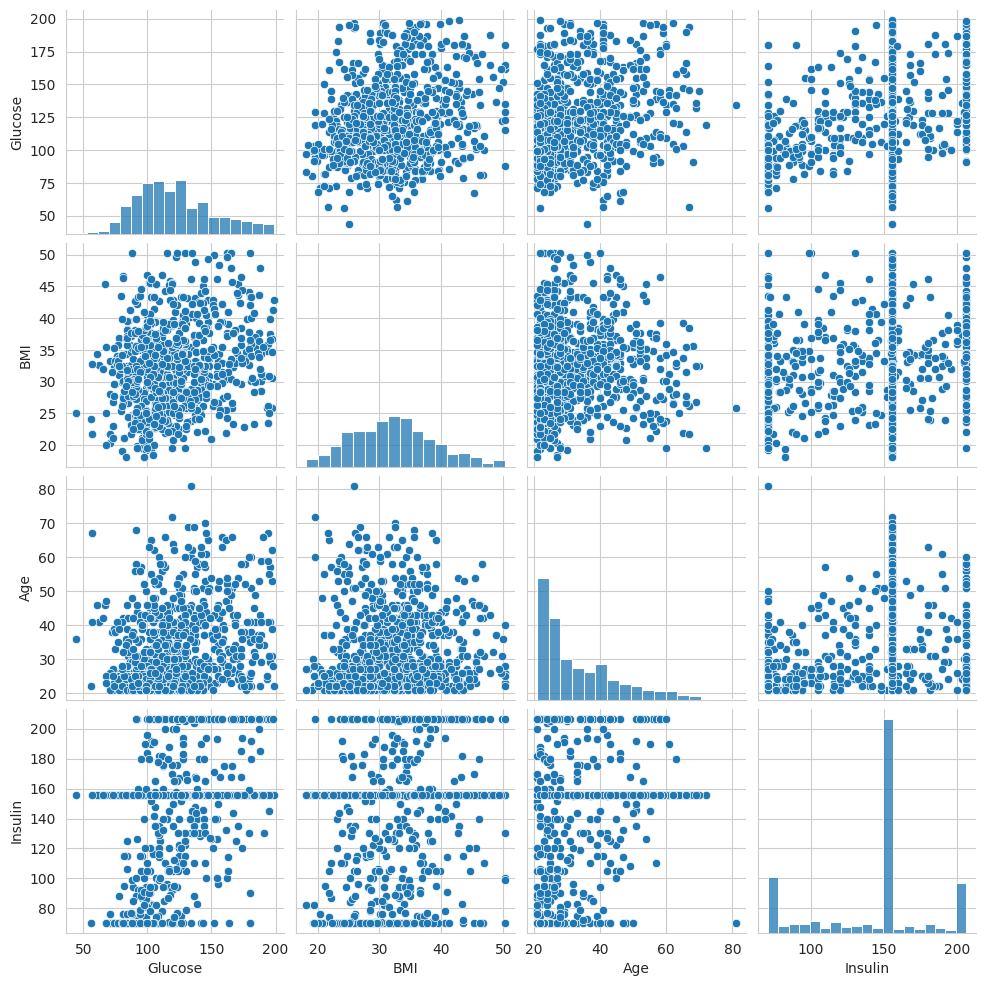

In [ ]:
sns.pairplot(diabetes[['Glucose', 'BMI', 'Age', 'Insulin']])


**Q10: Heatmap for Correlation Matrix**
Generate a heatmap of the correlation matrix of the dataset.


<Axes: >

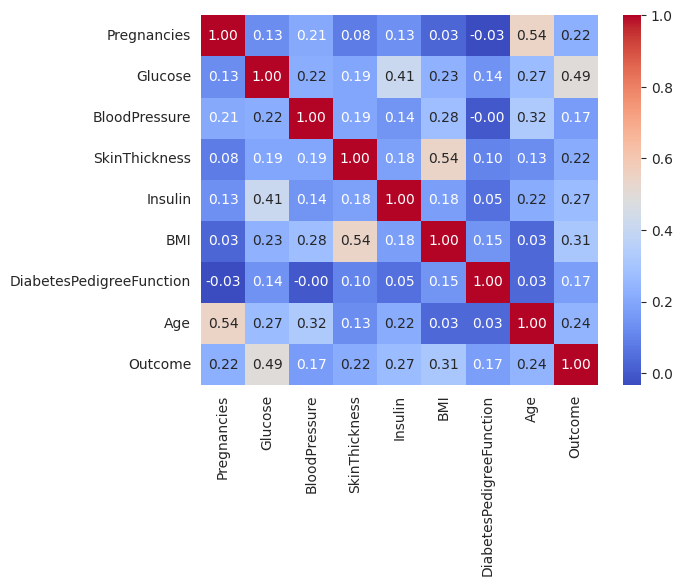

In [ ]:
correlation_matrix = diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

## Part 4: Feature Engineering


**Q11: Creating New Features**
Create a new binary feature named 'HighBMI' where the value is 1 if 'BMI' is above 30. (Tips: you can use 'np.where')


In [ ]:
diabetes['HighBMI'] = np.where(diabetes['BMI'] >= 30, 1, 0)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HighBMI
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,1
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,1
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,1



**Q12: Encoding Categorical Variables**
Convert the 'Outcome' column to a categorical variable if it's not already.


In [ ]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HighBMI
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,1
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,1
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,1


## Part 5: Model Building


**Q13: Data Splitting**
Split the dataset into features (`X`) and the target variable (`y`), and into training and test sets (test size: 30%, random state:42)


In [ ]:
X = diabetes.drop(['Outcome'],axis=1) # features
y = diabetes['Outcome'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


**Q14: Feature Scaling**
Scale the features using `StandardScaler`.


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Q14.1** Explain why feature scaling is particularly important in logistic regression. Discuss how the performance and convergence of the logistic regression algorithm can be affected if the features are not scaled? What does 'SandardScaler' do?

<font color='red'>
Since a lot of the models are based on the concept of Euclidean Distances, the features with greater scales would have a greater impact on the solution, then those of smaller values. Scaling ensures that all features contribute equally, preventing domination by high-scale features and facilitating a more efficient and stable convergence process.
</font>


<font color='red'>**performance and convergence **
* Convergence Issues: Logistic regression relies on optimization algorithms(like gradient descent) to find the optimal parameters. If the features are on different scales, the optimization process can be slow or may not converge at all. Some features may dominate the updates, while others might not contribute much.
* Performance Discrepancies: Logistic regression uses the sigmoid function to map the linear combination of features and coefficients to probabilities. When features are not scaled, the coefficients associated with different features reflect their respective scales. </font>




<font color='red'>'StandardScaler' is fitted on the training data and then used to transform both the training and test data. This ensures that all features contribute equally to the model, preventing issues related to varying scales and improving the convergence and performance of algorithms like logistic regression. <font>

## Part 6: Model Training and Evaluation


**Q15: Training the Logistic Regression Model**
Train a logistic regression model and fit it to the scaled training data.


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()


**Q16: Making Predictions**
Use the trained model to make predictions on the test set.


In [ ]:
predictions = model.predict(X_test)


**Q17: Model Evaluation**
Evaluate the model's performance using accuracy and the confusion matrix.


In [ ]:
confusion_matrix(y_test, predictions)

array([[120,  31],
       [ 33,  47]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7229437229437229

**Q17.1:** Given the output of the model's accuracy and confusion matrix, analyze the balance between the types of errors made by the classifier. In a medical context, how might the consequences of false positives compare to false negatives for a condition like diabetes? Based on the confusion matrix, suggest one strategy to improve the model if reducing false negatives is a higher priority

<font color='red'>
As Rate of false positives = 31/(31+120) = 0.205 < Rate of false negatives = 33/(33+47) = 0.413, it seems that the model is relatively better at avoiding false positives (Type I errors) compared to false negatives (Type II errors).
</font>

<font color='red'>In a medical context
*   False Positives: Patients being wrongly diagnosed with diabetes.
*   False Negatives: Patients with diabetes being wrongly classified as not having the condition.
</font>

<font color='red'>**Adjust the classification threshold**
The threshold determines the probability above which the model predicts the positive class (e.g., diabetes). Since false negatives are more concerning, you can lower the threshold, making the model more sensitive and capturing more instances of the positive class.</font>




## Part 7: Model Optimization


**Q18: Hyperparameter Tuning with Grid Search:**
Set up a grid search to optimize the 'C' parameter of the logistic regression model.


In [ ]:
# The best model parameters are determined by the highest cross-validation accuracy.
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

10

In [ ]:
# Initialize the best model and parameters
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

In [ ]:
# Loop over the grid of parameters
for C in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag']:
        # Set up the model with the current set of parameters
        model = LogisticRegression(C=C, solver=solver, random_state=42)
        accuracy = np.zeros(10)
        np_idx = 0

        # Perform K-Fold cross-validation
        for train_idx, test_idx in kfold.split(X):
            # Split the data and scale the features
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Train the model and make predictions
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

            # Calculate the accuracy for the current fold
            TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)
            accuracy[np_idx] = ACC * 100
            np_idx += 1

        # Update the best model and parameters if the current model is better
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C': C, 'solver': solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)


**Q19: Finding the Best Parameters**
After the grid search, report the best parameters and corresponding accuracy.


In [ ]:
# Print the best parameters and the corresponding score
print("The optimal logistic regression model uses C={}, and a {} solver, achieving a cross-validation accuracy of {}% with a standard deviation of {}%.".format(best_params['C'], best_params['solver'], round(best_accuracy, 3), round(best_std, 3)))

The optimal logistic regression model uses C=0.01, and a liblinear solver, achieving a cross-validation accuracy of 76.683% with a standard deviation of 5.137%.


**Q19.1:** How does the 'C' parameter in logistic regression influence the model's complexity, and why is it important to find an optimal value for 'C' using techniques like grid search? Discuss how the choice of 'C' can impact the balance between bias and variance in the model's performance.

<font color='red'>**Impact on Model Complexity:**
Smaller 'C' (Strong Regularization): Leads to simpler models with smaller coefficients. The model is more likely to underfit the training data as it pays more attention to regularization penalties, leading to a smoother decision boundary. Larger 'C' (Weak Regularization): Allows the model to fit the training data more closely, potentially capturing noise in the data. This may result in a more complex model that is prone to overfitting.
</font>

<font color='red'>**Grid Search and Cross-Validation:**
Since the choice of 'C' significantly influences the model's performance, it's crucial to find an optimal value. Grid search, often combined with cross-validation, is a technique to systematically search through a range of 'C' values and select the one that provides the best generalization performance on unseen data.
</font>

<font color='red'>**Impact on Bias and Variance:**
Smaller 'C' (Strong Regularization): Increases bias and decreases variance. The model is biased toward a simpler form, but it's less sensitive to variations in the training data. Larger 'C' (Weak Regularization): Decreases bias and increases variance. The model becomes more complex, fitting the training data closely, but it may be more sensitive to variations, leading to higher variance.
</font>

## Part 8: Conclusion and Discussion


**Q20: Model Interpretation**
Interpret the coefficients of the logistic regression model.


In [ ]:
model.coef_

array([[ 0.44640002,  1.02465733, -0.07779888,  0.00159686,  0.16669801,
         0.34940549,  0.30656801,  0.06812988,  0.399551  ]])

In [ ]:
# Accessing coefficients
coefficients = model.coef_[0].round(5)

# Interpretation
for i, coef in enumerate(coefficients):
    print(f'Coefficient for {X.columns[i]}: {coef}')

Coefficient for Pregnancies: 0.4464
Coefficient for Glucose: 1.02466
Coefficient for BloodPressure: -0.0778
Coefficient for SkinThickness: 0.0016
Coefficient for Insulin: 0.1667
Coefficient for BMI: 0.34941
Coefficient for DiabetesPedigreeFunction: 0.30657
Coefficient for Age: 0.06813
Coefficient for HighBMI: 0.39955


In [ ]:
# get importance
importance = abs(model.coef_[0])
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (X.columns[i],v))

Feature: Pregnancies, Score: 0.44640
Feature: Glucose, Score: 1.02466
Feature: BloodPressure, Score: 0.07780
Feature: SkinThickness, Score: 0.00160
Feature: Insulin, Score: 0.16670
Feature: BMI, Score: 0.34941
Feature: DiabetesPedigreeFunction, Score: 0.30657
Feature: Age, Score: 0.06813
Feature: HighBMI, Score: 0.39955


**Q20.1:**Given the array of coefficients for the logistic regression model, describe how each feature's coefficient affects the probability of the positive class in the model. Which features are most influential in predicting the outcome, and how do you interpret the positive and negative signs of the coefficients?

<font color='red'>

1. Pregnancies (0.4464): An increase in the number of pregnancies is associated with an increase in the log-odds of the positive class.
2. Glucose (1.02466): An increase in glucose level is strongly associated with an increase in the log-odds of the positive class.
3. BloodPressure (-0.0778): An increase in blood pressure is associated with a decrease in the log-odds of the positive class.
4. SkinThickness (0.0016): A small increase in skin thickness is associated with a small increase in the log-odds of the positive class.
5. Insulin (0.1667): An increase in insulin level is associated with an increase in the log-odds of the positive class.
6. BMI (0.34941): An increase in BMI is associated with an increase in the log-odds of the positive class.
7. DiabetesPedigreeFunction (0.30657): An increase in the diabetes pedigree function is associated with an increase in the log-odds of the positive class.
8. Age (0.06813): An increase in age is associated with an increase in the log-odds of the positive class.
9. HighBMI (0.39955): If a person has a high BMI (assuming this is a binary variable), it is associated with an increase in the log-odds of the positive class.

</font>

<font color='red'> Glucose with larger magnitude coefficients (1.00965) are the most influential in predicting the outcome. It has a stronger impact on the log-odds of having diabetes.

<font color='red'> The most influential in predicting the outcome
*   Positive Coefficients: Features with positive coefficients (e.g., Glucose, BMI, HighBMI) are associated with an increase in the log-odds of having diabetes. As these features increase, the likelihood of having diabetes also increases.
*   Negative Coefficient (BloodPressure): BloodPressure has a negative coefficient, meaning that as blood pressure increases, the log-odds of having diabetes decrease.
</font>


**Q21: Model Performance Discussion**
Discuss the model's performance and its potential real-world implications.


<font color='red'>The model's accuracy is 72.29% and cross-validation accuracy of 76.683%, indicating that it correctly predicts the outcome for approximately three-quarters of the instances. However, examining the confusion matrix reveals that the model has a notable number of false positives and false negatives, suggesting imbalances in sensitivity and specificity. In real-world implications, this could mean the model might misclassify individuals, leading to potential consequences such as unnecessary interventions or missed opportunities for early detection of diabetes.</font>




**Q22: Model Improvement Suggestions:**
Propose ways to improve the model or the modeling process.


<font color='red'>

1.   **Feature Engineering:** Explore additional relevant features or transformations to capture more nuanced patterns in the data.
2.   **Cross-Validation**: Utilize cross-validation techniques to get a more reliable estimate of the model's performance and ensure robustness across different subsets of the data.
3. **Ensemble Methods:** Explore ensemble methods such as random forests or gradient boosting to harness the collective predictive power of multiple models, potentially improving overall performance.

</font>
